## Worgroup 5 - Grupo 6 :

- <a href='#1.0'> 1. Plot </a> 
- <a href='#1.1'> 2. Regex </a> 

In [52]:
#importamos nuestras librerías
import pandas as pd
import numpy as np
import warnings
import os
import pyreadstat
import re  # for regular expressions (REGEX)

import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
import unidecode # to drop tildes
from datetime import datetime  # library for time
import math

warnings.filterwarnings('ignore') 


## <a id='1.0'> 1. Plot </a> 

In [6]:
#Leer el excel
data_plot = pd.read_excel("../../data/produccion_coca/6.1.1_-_Illicit_coca_bush_cultivation.xlsx")
data_plot

,"Global illicit cultivation of coca bush, 2009-2020 (hectares)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2009-01-04 00:00:00,2010-01-04 00:00:00,2011-01-04 00:00:00,2012-01-04 00:00:00,2013-01-05 00:00:00,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bolivia (Plurinational State of),30900,31000,27200,25300,23000,20400.0,20200.0,23100.0,24500.0,23100.0,25500.0,29400.0
4,Colombia a,73000,62000,64000,48000,48000,69000.0,96000.0,146000.0,171000.0,169000.0,154000.0,142800.0
5,Peru b,59900,61200,62500,60400,49800,42900.0,40300.0,43900.0,49900.0,54100.0,54700.0,61800.0
6,Total,163800,154200,153700,133700,120800,132300.0,156500.0,213000.0,245400.0,246200.0,234200.0,234200.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Sources: Plurinational State of Bolivia: natio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,a) Net area on 31 December.\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#usamos el método iloc para seleccionar las filas y columnas deseadas del dataframe
refer = data_plot.iloc[3:6, 1:].copy()
#se utiliza el método T para transponer el dataframe y rename() para cambiar los nombres de las columnas.
refer = refer.T.rename(columns={3: "Bolivia", 4: "Colombia", 5: "Peru"})
refer['year'] = pd.to_datetime(range(2009, 2021), format='%Y')
refer.reset_index(drop=True, inplace=True)
refer



,Bolivia,Colombia,Peru,year
0,30900,73000,59900,2009-01-01
1,31000,62000,61200,2010-01-01
2,27200,64000,62500,2011-01-01
3,25300,48000,60400,2012-01-01
4,23000,48000,49800,2013-01-01
5,20400.0,69000.0,42900.0,2014-01-01
6,20200.0,96000.0,40300.0,2015-01-01
7,23100.0,146000.0,43900.0,2016-01-01
8,24500.0,171000.0,49900.0,2017-01-01
9,23100.0,169000.0,54100.0,2018-01-01


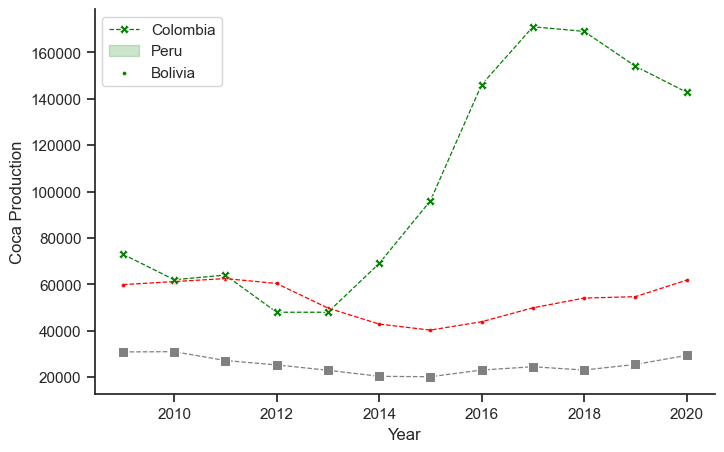

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params) 

fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(x="year", y="Colombia", data=refer, color="green", legend=False, marker="X", markersize=7, linewidth=0.9, linestyle="dashed")
sns.scatterplot(x="year", y="Colombia", data=refer, color="green", legend=False, s=8)

sns.lineplot(x="year", y="Peru", data=refer, color="red", legend=False, linewidth=0.9, linestyle="dashed")
sns.scatterplot(x="year", y="Peru", data=refer, color="red", legend=False, s=8)

sns.lineplot(x="year", y="Bolivia", data=refer, color="grey", legend=False, linewidth=0.9, marker="s", markersize=7, linestyle="dashed")
sns.scatterplot(x="year", y="Bolivia", data=refer, color="grey", legend=False, s=8)

# Etiquetas en los ejes
ax.set_ylabel('Coca Production')
ax.set_xlabel('Year')

# Crear leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels=["Colombia", "Peru", "Bolivia"])

plt.show()




### 2. Gráfico de erradicación de hectareas de hoja de Coca.

In [39]:
#Leer el excel   ----
reporte_coca = pd.read_excel('../../data/produccion_coca/6.1.2_-_Eradication_of_coca_bush.xlsx')
reporte_coca

## No nos olvidamos de trasponer (información en columnas)
Transreporte_coca = reporte_coca.T
Transreporte_coca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Unnamed: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Reported eradication of coca bush, 2009-2020",NaN,Bolivia (Plurinational State of),Colombia,Peru,NaN,NaN,Source: United Nations Office on Drugs and Cri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,. .
Unnamed: 3,Method of eradication,manual,manual,manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,Unit,hectare,hectare,hectare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 5,2009.0,6341.0,165336.95,10025.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 6,2010.0,8200.0,145743.69,12033.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 7,2011.0,10509.0,138503.23,10290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 8,2012.0,11044.0,131004.75,14171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 9,2013.0,11407.0,69173.469,23785.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Renombramos
Transreporte_coca.rename(columns={ Transreporte_coca.columns[0]: "Año" }, inplace = True)
Transreporte_coca.rename(columns={ Transreporte_coca.columns[1]: "Bolivia"}, inplace = True)
Transreporte_coca.rename(columns={ Transreporte_coca.columns[2]: "Colombia"}, inplace = True)
Transreporte_coca.rename(columns={ Transreporte_coca.columns[3]: "Peru"}, inplace = True)

#eliminamos columnas - eje 1
Transreporte_coca = Transreporte_coca.drop([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], axis=1)

#Reducimos la informacion contenida
Transreporte_coca = Transreporte_coca.drop(['Reported eradication of coca bush, 2009-2020'], axis=0)
Transreporte_coca = Transreporte_coca.drop(['Unnamed: 0', 'Unnamed: 1'], axis=0)
Transreporte_coca = Transreporte_coca.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 17'], axis=0)
Transreporte_coca['Año'] = Transreporte_coca['Año'].astype('int')
Transreporte_coca['Peru'] = Transreporte_coca['Peru'].astype('int')
Transreporte_coca['Bolivia'] = Transreporte_coca['Bolivia'].astype('int')
Transreporte_coca['Colombia'] = Transreporte_coca['Colombia'].astype('int')

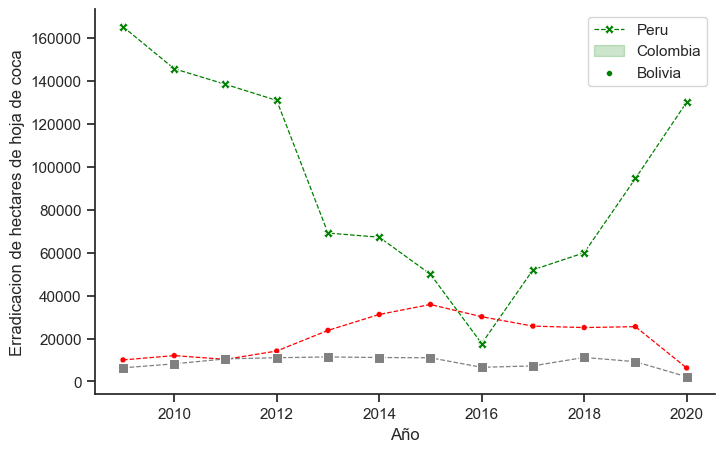

In [41]:
#Creacion del grafico con etiquetas y leyenda
graff = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=graff) 

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x= "Año" , y= "Colombia", data = Transreporte_coca, color="green", legend=False, marker = "X", markersize = 7, linewidth = 0.9, linestyle = "dashed")
sns.scatterplot(x= "Año" , y= "Colombia", data = Transreporte_coca, color="green", legend=False, size = 0.8)

sns.lineplot(x= "Año" , y= "Peru", data = Transreporte_coca, color="red", legend=False, linewidth = 0.9, linestyle = "dashed")
sns.scatterplot(x= "Año" , y= "Peru", data = Transreporte_coca, color="red", legend=False, size = 0.8)

sns.lineplot(x= "Año" , y= "Bolivia", data = Transreporte_coca, color="grey", legend=False, linewidth = 0.9, marker = "s", markersize = 7, linestyle = "dashed")
sns.scatterplot(x= "Año" , y= "Bolivia", data = Transreporte_coca, color="grey", legend=False, size = 0.8)

plt.ylabel('Erradicacion de hectares de hoja de coca')
plt.xlabel('Año')

plt.legend( labels = ["Peru", "Colombia", "Bolivia"])

### 3. Gráfico con la producción y erradicación de hoja de coca en el Perú.

In [42]:
Transreporte_coca = Transreporte_coca.rename(columns={"Peru": "Peru - produccion", "Bolivia": "Bolivia - produccion", "Colombia": "Colombia - produccion", "Year2": "Año"})
Transreporte_coca

,Año,Bolivia - produccion,Colombia - produccion,Peru - produccion
Unnamed: 5,2009,6341,165336,10025
Unnamed: 6,2010,8200,145743,12033
Unnamed: 7,2011,10509,138503,10290
Unnamed: 8,2012,11044,131004,14171
Unnamed: 9,2013,11407,69173,23785
Unnamed: 10,2014,11144,67234,31206
Unnamed: 11,2015,11020,49967,35868
Unnamed: 12,2016,6577,17642,30151
Unnamed: 13,2017,7237,52000,25784
Unnamed: 14,2018,11174,59977,25106


In [43]:
#Fucionamos
merge = pd.merge(Transreporte_coca, Transreporte_coca, on="Año")
merge

,Año,Bolivia - produccion_x,Colombia - produccion_x,Peru - produccion_x,Bolivia - produccion_y,Colombia - produccion_y,Peru - produccion_y
0,2009,6341,165336,10025,6341,165336,10025
1,2010,8200,145743,12033,8200,145743,12033
2,2011,10509,138503,10290,10509,138503,10290
3,2012,11044,131004,14171,11044,131004,14171
4,2013,11407,69173,23785,11407,69173,23785
5,2014,11144,67234,31206,11144,67234,31206
6,2015,11020,49967,35868,11020,49967,35868
7,2016,6577,17642,30151,6577,17642,30151
8,2017,7237,52000,25784,7237,52000,25784
9,2018,11174,59977,25106,11174,59977,25106


ValueError: Could not interpret value `Peru - erradicacion` for parameter `y`

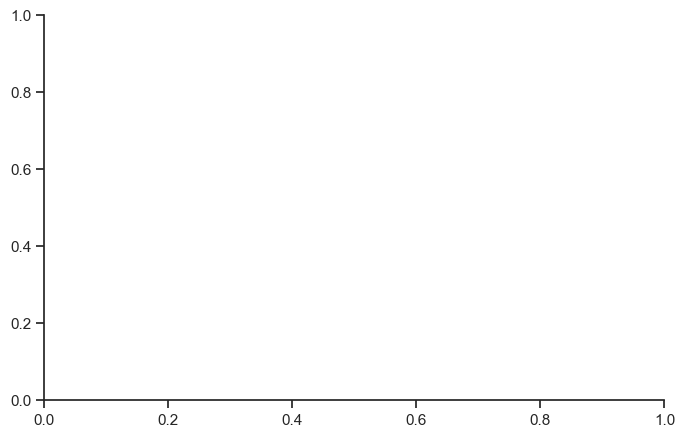

In [47]:
#Creacion del grafico con etiquetas y leyenda
graff1 = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=graff) 

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x= "Año" , y= "Peru - erradicacion", data = merge, color="green", legend=False, marker = "X", markersize = 7, linewidth = 0.9, linestyle = "dashed")
sns.scatterplot(x= "Año" , y= "Peru - erradicacion", data = merge, color="green", legend=False, size = 0.8)

sns.lineplot(x= "Año" , y= "Peru - produccion", data = merge, color="red", legend=False, linewidth = 0.9, linestyle = "dashed")
sns.scatterplot(x= "Año" , y= "Peru - produccion", data = merge, color="red", legend=False, size = 0.8)

plt.ylabel('Produccion y Erradicacion de hoja de coca en el Peru')
plt.xlabel('Año')
plt.legend(["Erradicación", "Producción"])

## <a id='1.0'> 2. Regex </a> 

In [21]:
#1. Base de datos metropolitano
# Cargamos el archivo Excel
metro = pd.read_excel("../../data/metropolitano.xlsx")

# Definimos el patrón de la coordenada que busca los números de grados, minutos y segundos 
patrón = r'(-?\d{1,3})\s*°\s*(\d{1,2})\s*\'\s*(\d{1,2}\.\d{1,2})\"'

# Función para cambiar el formato de las coordenadas
def format_coordinates(match):
    grados = float(match.group(1))
    minutos = float(match.group(2))
    segundos = float(match.group(3))
    
    # Transformamos a coordenadas decimales
    coordenadas = grados + (minutos / 60) + (segundos / 3600)
    
    # Acotamos que solo queremos 2 decimales
    return f"{coordenadas:.2f}"

# Aplicamos re.sub a las columnas 'sur_latitud' y 'oeste_longitud' para cambiar el formato de las coordenadas
metro['sur_latitud'] = metro['sur_latitud'].apply(lambda x: re.sub(pattern, format_coordinates, str(x)))
metro['oeste_longitud'] = metro['oeste_longitud'].apply(lambda x: re.sub(pattern, format_coordinates, str(x)))

# Creamos una nueva columna 'coordenadas' que contiene la concatenación de 'sur_latitud' y 'oeste_longitud' en un formato de coordenadas
metro['coordenadas'] = '(' + metro['sur_latitud'] + ', ' + metro['oeste_longitud'] + ')'

# Imprimimos la columna 'coordenadas'
print(metro['coordenadas']) #encontramos 140  coordenadas geográficos


0        (11.98S, 77.06O)
1        (11.99S, 77.06O)
2        (11.99S, 77.06O)
3        (12.00S, 77.06O)
4        (12.00S, 77.05O)
              ...        
135    ( 12.06S,  77.02O)
136    ( 12.06S,  77.03O)
137    ( 12.06S,  77.03O)
138    ( 12.06S,  77.04O)
139    ( 12.06S,  77.02O)
Name: coordenadas, Length: 140, dtype: object


In [27]:
#2. Carpeta estudiantes
# Cargamos el archivo Excel
estudiantes = pd.read_excel("../../data/estudiantes/base_students.xlsx")

# Especificamos el nombre de la columna que contiene la data de interés (NAME)
name = 'NAME'

# Usamos el método str.replace() para eliminar los caracteres no deseados utilizando una expresión regular
estudiantes[name] = estudiantes[name].str.replace(r'[^A-Za-z\s]', '')

# Imprimimos el contenido de la columna NAME después de la limpieza
print(estudiantes[name])


0             JOAN AYALA FERRERAS  
1                 JOAN  BAEZ TEJADO
2              MARC BASTARDES SOTO 
3          JOSEP ANGUERA VILAFRANCA
4                 JOAN ANDREU CRUZ 
5              JORDI RAYA   GAVILAN
6             ARAN ALVAREZ FERNNDEZ
7               JAVIER BENITEZ JOSE
8              MARIO PASCUAL FLORES
9                  JESUS AYALA TORN
10         GEMMA   LISTAN FIGUERAS 
11            SILVIA RASERO GAVILAN
12             ALBERT ARNALOT PUIG 
13            MARIA MOLINER GARRIDO
14           BERTA GALOBART  GARCIA
15          BERTA LPEZ GARRIGASSAIT
16               MIREIA SNCHEZ GMEZ
17              GEMMA ALAVEDRA SUNY
18        MARIA ISABEL ALIGU BONVEH
19                 TONI MAS FRANCH 
20            ALEJANDRO ALOY COMPTE
21           JOAN MART ASENSIO VEGA
22                 CARLOS ACUA TORT
23             DAVID   ALGU TRANCHO
24          CRISTINA BADIA CASTILLO
25    JULIO ALBERTO  BENITEZ FLORES
26          CRISTINA ARISSA HERMOSO
27        JOS ANTONIO BARALD

In [28]:
    #Limpiamos el nombre de los estudiantes
    
# Especificamos el nombre de la columna que contiene la data de interés
nombre = 'BORN_DATE'

# Usamos el método str.replace() y una expresión regular para extraer los números y '/' de las fechas de nacimiento
#retiramos caracteres especiales, número , etc que no permite identificar los nombres adecuadamente
estudiantes[columna] = estudiantes[nombre].str.replace(r'[^0-9/]', '')

# Imprimimos el contenido de la columna BORN_DATE después de la limpieza
print(estudiantes[nombre])


0         23/08/1998
1         22/02/2004
2         05/01/1998
3         21/02/1999
4     27/06/19820000
5         15/06/1991
6         03/09/1993
7         18/02/1975
8     14/11/19860000
9         16/08/1993
10        16/07/1992
11           1000000
12        18/03/2001
13        28/08/2000
14        22/03/1973
15        19/05/1998
16    28/11/19820000
17       02/016/1992
18        13/01/2000
19        26/03/1995
20    05/01/19890000
21        08/03/2003
22        03/07/1979
23        18/10/1995
24        08/02/1990
25    26/09/19770000
26        16/04/2000
27        05/05/1982
28        27/01/1999
29        18/10/1995
30          00/00/00
31         1/10/2004
32        18/12/1998
33        18/10/1999
34        18/06/2000
35        18/10/1996
36        18/05/1997
37         4/10/2003
38        18/10/2004
39        31/05/1999
40        18/10/2006
41        10/01/2003
42        18/10/2008
43        18/04/2010
44               NaN
45            000000
46        18/10/2012
47        18/

In [29]:
    #limpiamos la fecha de nacimiento y edad

# Asignamos el formato date a la fecha de nacimiento.
patrón2 = r'\D+'

# Convertimos la columna 'AGE' a tipo string y usamos el método str.replace() con el patrón regex para extraer los números
estudiantes['AGE'] = estudiantes['AGE'].astype(str).str.replace(pattern, '')#Creamos una variable con el año de nacimiento

# Imprimimos las edades limpias
print(estudiantes['AGE'])


0         10
1         15
2         14
3         16
4         15
5         17
6         12
7         11
8          8
9          9
10        11
11        13
12         6
13         7
14         6
15         5
16         7
17        28
18        14
19        16
20        15
21        16
22        14
23    999999
24        11
25        13
26        20
27        14
28         7
29        15
30        14
31     99999
32        12
33        11
34        10
35        14
36        13
37         7
38         6
39        11
40         4
41         7
42        12
43        10
44          
45        15
46         8
47        10
Name: AGE, dtype: object


In [31]:

# Especificamos el nombre de la columna que contiene la data de interés (GENDER)
género = 'GENDER'

# Usamos la variable GENDER para crear una dummy que tome el valor de 1 para female y 0 para males.
estudiantes['dummy_GENDER'] = estudiantes[género].astype(str).str.contains('f', flags=re.IGNORECASE).astype(int)

# Imprimimos los valores de la columna dummy_variable
print(estudiantes['dummy_GENDER'])




0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    0
13    1
14    1
15    1
16    1
17    1
18    1
19    0
20    0
21    0
22    0
23    0
24    1
25    0
26    1
27    0
28    0
29    0
30    0
31    1
32    0
33    0
34    0
35    0
36    1
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    1
45    1
46    1
47    1
Name: dummy_GENDER, dtype: int32


In [32]:
#Continunado con lo anterior:
#generamos una variable dummy que tome el valor de 1 si el colegio al cual asiste la o el menor es pública, y 0 si es privada.

# Especificamos el nombre de la columna que contiene la data de interés (TYPE_ADM_SCHOOL)
columna = 'TYPE_ADM_SCHOOL'

# Creamos una columna de valores dummy con 1 si es pública y 0 si es privada utilizando una expresión regular
estudiantes['dummy_SCHOOL'] = estudiantes[columna].astype(str).str.contains('u', flags=re.IGNORECASE).astype(int)

# Imprimimos los valores de la columna dummy_variable
print(estudiantes['dummy_SCHOOL'])


0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     0
9     0
10    1
11    0
12    1
13    0
14    1
15    1
16    0
17    0
18    1
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
27    1
28    1
29    1
30    0
31    0
32    1
33    1
34    0
35    1
36    1
37    1
38    1
39    0
40    0
41    0
42    1
43    0
44    0
45    1
46    1
47    1
Name: dummy_SCHOOL, dtype: int32


In [34]:
    #Creamos una variable con el usuario del correo electrónico (rmendozam@pucp.edu.pe, usuario : rmendozam)

# Especificamos el nombre de la columna que contiene la data de interés
e_mail = 'MAIL'

# Usamos str.split para dividir la dirección de correo electrónico en dos partes utilizando el signo @ como separador y seleccionamos la primera parte con str[0]
estudiantes[e_mail ] = estudiantes[e_mail ].str.split('@').str[0]

# Imprimimos los valores modificados de la columna MAIL
print(estudiantes[e_mail])


0        albatros001
1             albert
2           alien_10
3             amores
4             anabel
5           antig56a
6      ballador_rios
7          balladora
8           barbilla
9           besugo13
10            bogart
11              bond
12         carretero
13              cela
14              coco
15          conejo11
16            corcel
17            dorada
18             elisa
19           encarna
20            entesa
21           groucho
22             harpo
23             hispa
24           madonna
25         mata_hari
26           melanie
27        melquíades
28       abogados_15
29              bond
30            garcia
31             diana
32    torresmarquina
33        pdominguez
34       satur_seb15
35           mendoda
36     palomino_rios
37           mendoda
38               jmg
39             tazoj
40       gon_melchor
41           mendoda
42               jmv
43           mflores
44          brios100
45           mendoda
46         jaqumatos
47           

In [51]:
    #Creamos una variable con el número de DNI del padre, madre o apoderado.

# Especificamos el nombre de la columna que contiene la data de interés DNI_NUMBER
dni = 'DNI_NUMBER'

# Usamos map y una función lambda para aplicar la expresión regular a cada elemento de la columna
estudiantes[dni] = estudiantes[dni].str.replace(r'[^0-9/]', '', regex=True)

# Imprimimos la columna para verificar que se hayan eliminado los caracteres no deseados
print(estudiantes[dni])



0     04
1     02
2     01
3     01
4     01
5     01
6     01
7     01
8     01
9     02
10    01
11    01
12    01
13    01
14    01
15    01
16    01
17    01
18    01
19    01
20    01
21    01
22    01
23    01
24    01
25    01
26    01
27    01
28    01
29    01
30    03
31    01
32    02
33    01
34    02
35    01
36    03
37    01
38    01
39    01
40    01
41    01
42    02
43    02
44    02
45    01
46    01
47    01
Name: DNI_NUMBER, dtype: object


In [55]:
    #Variable observaciones
#Recuperamos el nombre y edad correctos, y reemplazamos en las variables de nombre (NAME) y edad respectivamente (AGE)
import pandas as pd
import re

# Leemos el archivo csv con los datos y especificamos el nombre de la columna que contiene los valores a limpiar
columna = 'observaciones'

# Usamos la función extract y una expresión regular para extraer los valores que siguen a la palabra "es" en cada entrada de la columna observaciones
estudiantes[columna] = estudiantes[columna].str.extract(r'es\s*(.*)', expand=False)

# Creamos una lista vacía para almacenar los nombres limpios
nombres_limpios = []

# Iteramos sobre las entradas de la columna observaciones para limpiar los nombres
for entrada in estudiantes[columna]:
    match = re.search(r'[a-zA-Z\s]+', entrada)
    if match:
        nombre = match.group()
        nombres_limpios.append(nombre)
    else:
        nombres_limpios.append('')

# Creamos una lista vacía para almacenar las edades limpias
edades_correctas = []

# Iteramos sobre las entradas de la columna observaciones para limpiar las edades


nombres_limpios = []
edades_correctas = []

for entrada in df[columna]:
    match = re.search(r'[a-zA-Z\s]+', entrada)
    if match:
        nombre = match.group()
        nombres_limpios.append(nombre)
    else:
        nombres_limpios.append('')
    
    match = re.search(r'\d+', entrada)
    if match:
        edad = match.group()
        edades_correctas.append(edad)
    else:
        edades_correctas.append('')
        
        

# Creamos una nueva columna en el DataFrame con los nombres limpios
estudiantes['nombres_limpios'] = nombres_limpios

# Creamos una nueva columna en el DataFrame con las edades limpias
estudiantes['edades_correctas'] = edades_correctas

# Especificamos la columna AGE y usamos regex para extraer los números de las edades
columna_AGE = 'AGE'
estudiantes[columna_AGE] = estudiantes[columna_AGE].str.replace(r'[^\d]+', '', regex=True)

# Imprimimos la columna AGE para verificar que se hayan limpiado las edades
print(estudiantes[columna_AGE])


IndentationError: expected an indented block after 'for' statement on line 16 (2729435317.py, line 17)